In [20]:
import pandas as pd
df = pd.read_csv('car_price_dataset.csv') 
df.columns = df.columns.str.strip()

df.head()

#DataSet first view

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [21]:
df.info
df.isnull().sum()
#Checking if there is any null value to be handled

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [22]:
brand_counts = df["Brand"].value_counts()
brand_counts_df = brand_counts.reset_index()
brand_counts_df.columns = ["Brand", "Amount"]
print(brand_counts_df)
#checking how many brands and their quantity

        Brand  Amount
0        Ford    1048
1        Audi    1038
2  Volkswagen    1020
3       Honda    1009
4   Chevrolet    1003
5         BMW     999
6     Hyundai     995
7         Kia     976
8      Toyota     970
9    Mercedes     942


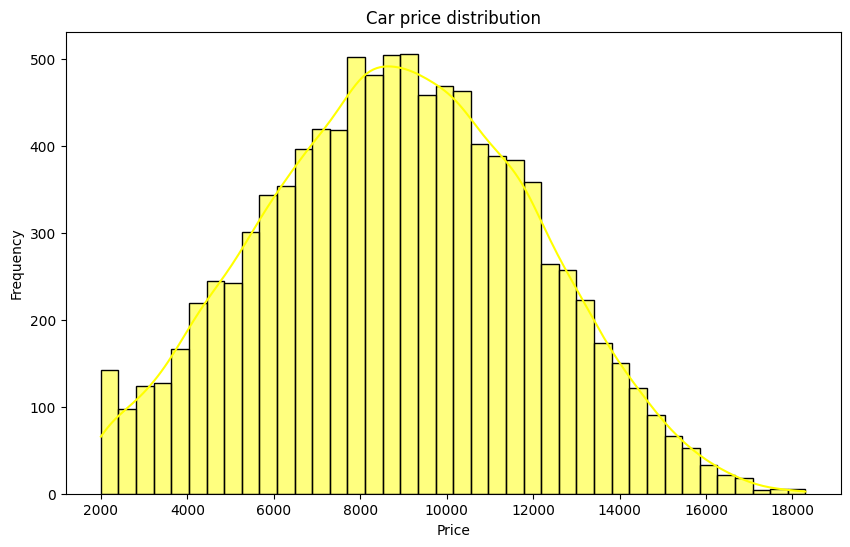

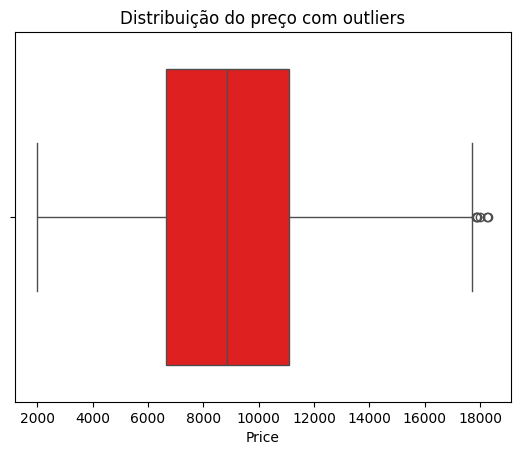

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,6))
sns.histplot(df["Price"], kde=True, color="yellow")
plt.title("Car price distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(x=df["Price"], color="red")
plt.title("Distribuição do preço com outliers")
plt.show()

In [24]:
from datetime import datetime

current_year = datetime.now().year

df['Age'] = current_year - df['Year']

df.head()
#creating the "age" column for cars

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Age
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,5
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,13
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,5
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,2
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,22


Text(0.5, 1.0, 'Price Distribution by Brand')

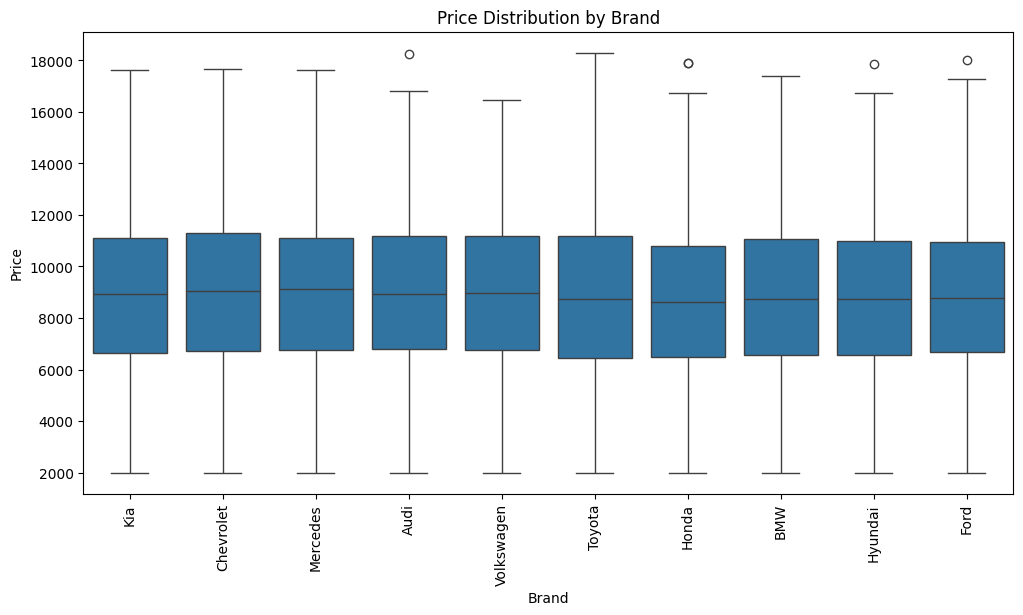

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x = "Brand", y = "Price", data=df)

plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Price")
plt.title("Price Distribution by Brand")

**Even with some values ​​outside the average, it is clear that the majority remain within the same range. Let's investigate what generates the changes.**

Text(0.5, 1.0, 'Price distribution by age')

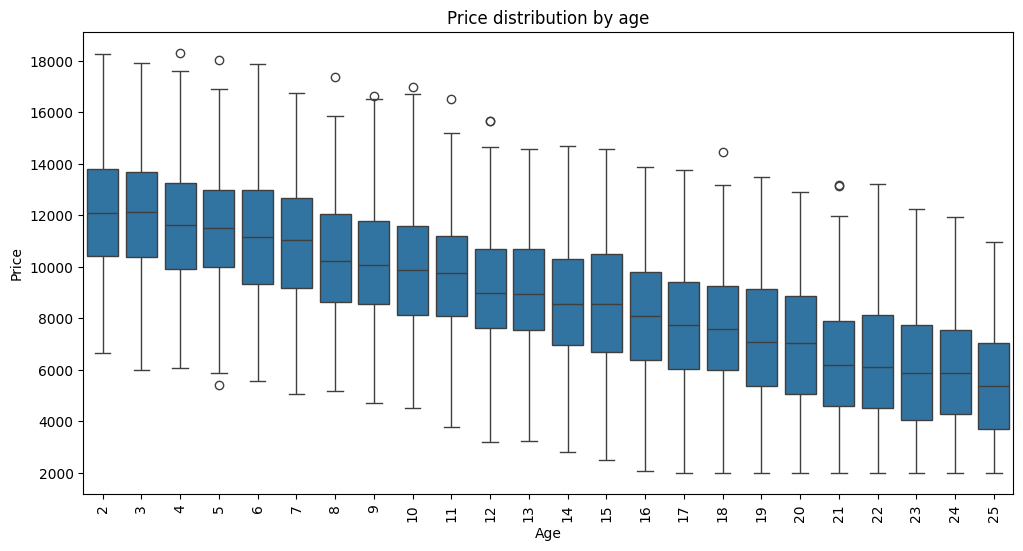

In [26]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x = "Age", y = "Price", data=df)

plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Price")
plt.title("Price distribution by age")

**Even with the exceptions, it is notable that the older the cars, the cheaper they get.**

C:\Users\Ribas\AppData\Local\Temp\ipykernel_8120\1727815844.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby("Miles range")["Price"].mean().reset_index()
C:\Users\Ribas\AppData\Local\Temp\ipykernel_8120\1727815844.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Miles range", y = "Price", data=df_grouped, palette=custom_palette)
C:\Users\Ribas\AppData\Local\Temp\ipykernel_8120\1727815844.py:10: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = "Miles range", y = "Price", data=df_grouped, palette=custom_palette)


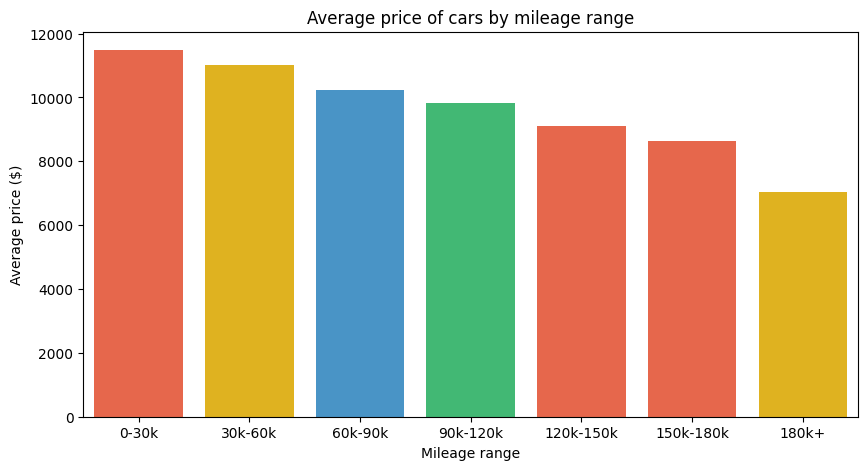

In [27]:
bins = [0, 30000, 60000, 90000, 120000, 150000, 180000, 300000]
labels = ["0-30k", "30k-60k", "60k-90k", "90k-120k", "120k-150k", "150k-180k", "180k+"]

df["Miles range"] = pd.cut(df["Mileage"], bins=bins, labels=labels)

df_grouped = df.groupby("Miles range")["Price"].mean().reset_index()

plt.figure(figsize=(10,5))
custom_palette = ["#FF5733", "#FFC300", "#3498DB", "#2ECC71", "#FF5733"]
sns.barplot(x = "Miles range", y = "Price", data=df_grouped, palette=custom_palette)

plt.xlabel("Mileage range")
plt.ylabel("Average price ($)")
plt.title("Average price of cars by mileage range")
plt.show()

**Taking mileage as a parameter now, it is also noticeable how high mileage lowers the price of cars.**

In [28]:
from scipy import stats

miles_range = df["Miles range"]
miles_range_groups = [df[df["Miles range"] == range_]["Price"] for range_ in miles_range.unique()]

f_stat, p_value = stats.f_oneway(*miles_range_groups)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

F-Statistic: 663.2200224899783, P-Value: 0.0


**These results of the F statistic and P value reinforce the information provided by the graph above, how related mileage and price are.**

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Brand Number'] = label_encoder.fit_transform(df['Brand'])
#giving numbers to brands in order to create a correlation with them

df['Miles Range number'] = label_encoder.fit_transform(df['Miles range'])
#giving numbers to miles range number in order to create a correlation with them

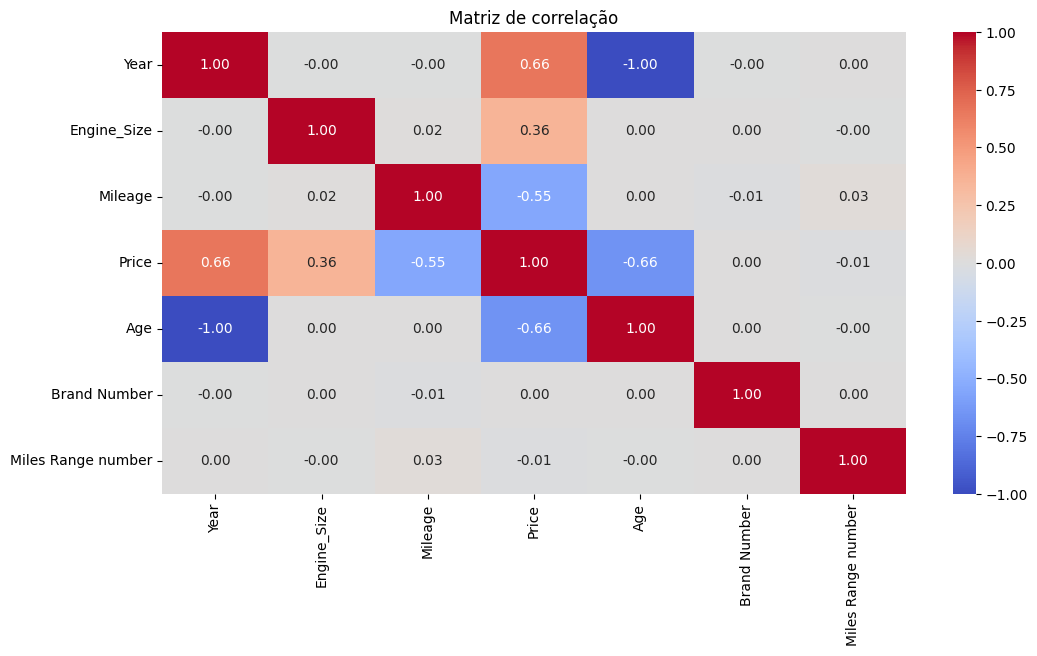

In [30]:
df_filtered = df.drop(columns=["Brand", "Model", "Fuel_Type", "Transmission", "Doors", "Owner_Count", "Miles range"])
correlation_matrix = df_filtered.corr()
#these variables were excluded so as not to affect the generation of the correlation matrix

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlação")
plt.show()

**Once again we see the connection that age and mileage have with the price of the car**

In [31]:
from scipy import stats

df_1_owner = df[df["Owner_Count"] == 1]["Price"]
df_2m_owners = df[df["Owner_Count"] > 1]["Price"]

t_stat, p_value = stats.ttest_ind(df_1_owner, df_2m_owners)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -0.18826431334815108, P-Value: 0.8506732797726112


Text(0.5, 1.0, 'Price distribution by Owner_Count')

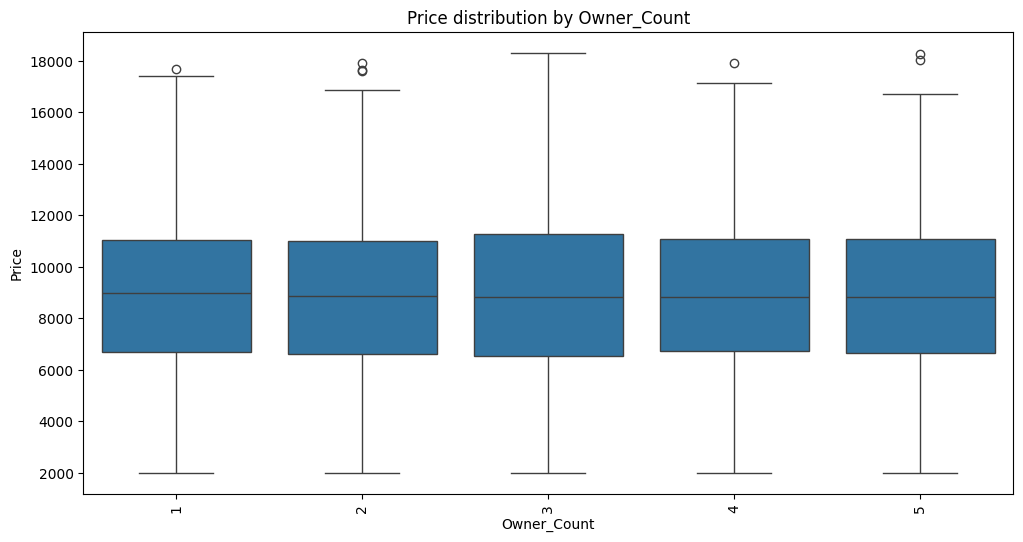

In [32]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x = "Owner_Count", y = "Price", data=df)

plt.xticks(rotation=90)
plt.xlabel("Owner_Count")
plt.ylabel("Price")
plt.title("Price distribution by Owner_Count")

**Both the tests and the graph make it clear that the number of previous owners has almost no effect on the price of the cars.**

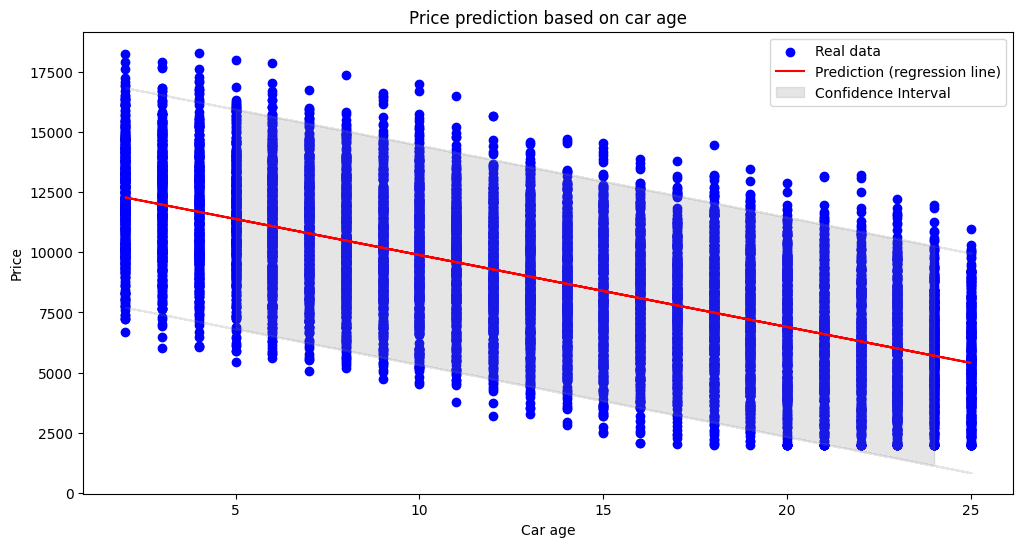

In [33]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

x = df[["Age"]].values
y = df["Price"]

model = LinearRegression()

model.fit(x, y)

y_pred = model.predict(x)

residuals = y - y_pred
std_error = np.std(residuals)

upper_bound = y_pred + 1.96 * std_error
lower_bound = y_pred - 1.96 * std_error

plt.figure(figsize=(12,6))
plt.scatter(x, y, color = 'blue', label = 'Real data')
plt.plot(x, y_pred, color='red', label='Prediction (regression line)')
plt.fill_between(x.flatten(), lower_bound, upper_bound, color='gray', alpha=0.2, label='Confidence Interval')
plt.title('Price prediction based on car age')
plt.xlabel("Car age")
plt.ylabel("Price")
plt.legend()
plt.show()

**Even with points far from the regression line (red), the gray space, which represents the confidence interval, shows that the age of the car is a very important variable when setting a price to sell a car.**